In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import interp
from itertools import cycle
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
def algorithm(algoname,colors,train,test,pos):
    mean_tpr,lw,i =0.0, 2,1
    mean_fpr = np.linspace(0, 1, 100)
    fold_accuracy= []
    skfold = StratifiedKFold(n_splits=10,shuffle = True)
    for (trainindex,testindex), color in zip(skfold.split(train, test.values.ravel()), colors):
        X_train, X_test = train.loc[trainindex], train.loc[testindex]
        y_train, y_test = test.loc[trainindex], test.loc[testindex]
        model = algoname.fit(X_train,y_train.values.ravel())
        fold_accuracy.append(model.score(X_test,y_test.values.ravel()))
        result = model.predict(X_test)
        fpr, tpr, thresholds= roc_curve(y_test.values,result,pos_label=pos)
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        #plt.step(fpr, tpr, lw=lw, color=color,label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
        i+=1
    mean_tpr /= skfold.get_n_splits(train,test.values.ravel())
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.step(mean_fpr, mean_tpr, color='g', linestyle='--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)
    plt.title("Average accuracy: {0:.3f}".format(np.asarray(fold_accuracy).mean()))
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc="lower right") 
    return ("Average accuracy: {0:.3f} (+/-{1:.3f})".format(np.asarray(fold_accuracy).mean(),\
                                                            np.asarray(fold_accuracy).std()))    

In [3]:
import math
import operator
def euclidean_distance(data1,data2):
    result = 0.0
    for val in range(len(data2)):
        result += (data1[val]-data2[val])**2
    return math.sqrt(result)
def knn(train,test,k):
    dist,kneighbors = [],[]
    for a,c in train.iterrows():
        distance = euclidean_distance(c,test)
        dist.append((c,distance))
        dist.sort(key=operator.itemgetter(1))
    for i in range(k):
        kneighbors.append(dist[i][0])
    return kneighbors  
def majorityVote(kneighbors):
    vote = {}
    for i in range(len(kneighbors)):
        lst = kneighbors[i][-1]
        if lst in vote:
            vote[lst]+=1
        else:
            vote[lst]=1
    majority = max(vote.items(), key=operator.itemgetter(1))[0]
    return majority

In [4]:
default = pd.read_excel('default of credit card clients.xls',skiprows=1)
default=default.rename(columns = {'default payment next month':'default'})
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [5]:
default_train,default_test = default.iloc[:,1:len(default.columns)-1],default.iloc[:,len(default.columns)-1]
default['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [6]:
estimators = [10,100,600,800,1000,1200]
depth = [1,2,50,100,300,800,None]
features = ['auto','sqrt',0.2, None]
min_sampleleaf = [1,5,10,50,100,200,500]
randomstate = [1,50,100,500,None]
colors = cycle(['brown','lightcoral','red','magenta','cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
penalties = ['l1','l2']
cvalue = [1.0,0.1,0.5,0.8,0.9]
solve = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
tolerance = []
classweight = ['balanced',None]
max_iter = [10,100,500,1000]
randomState = [None,10,100,500,1000,1024]
neighbors = [5,10,50,100]
weight = ['uniform','distance']
algo = ['auto', 'ball_tree', 'kd_tree', 'brute']
dual = [True,False]

# Random Forest

Estimators - Number of tress in the forest

Average accuracy: 0.803 (+/-0.006) estimators:  10
Average accuracy: 0.815 (+/-0.006) estimators:  100
Average accuracy: 0.817 (+/-0.004) estimators:  600
Average accuracy: 0.817 (+/-0.005) estimators:  800
Average accuracy: 0.817 (+/-0.005) estimators:  1000
Average accuracy: 0.817 (+/-0.004) estimators:  1200


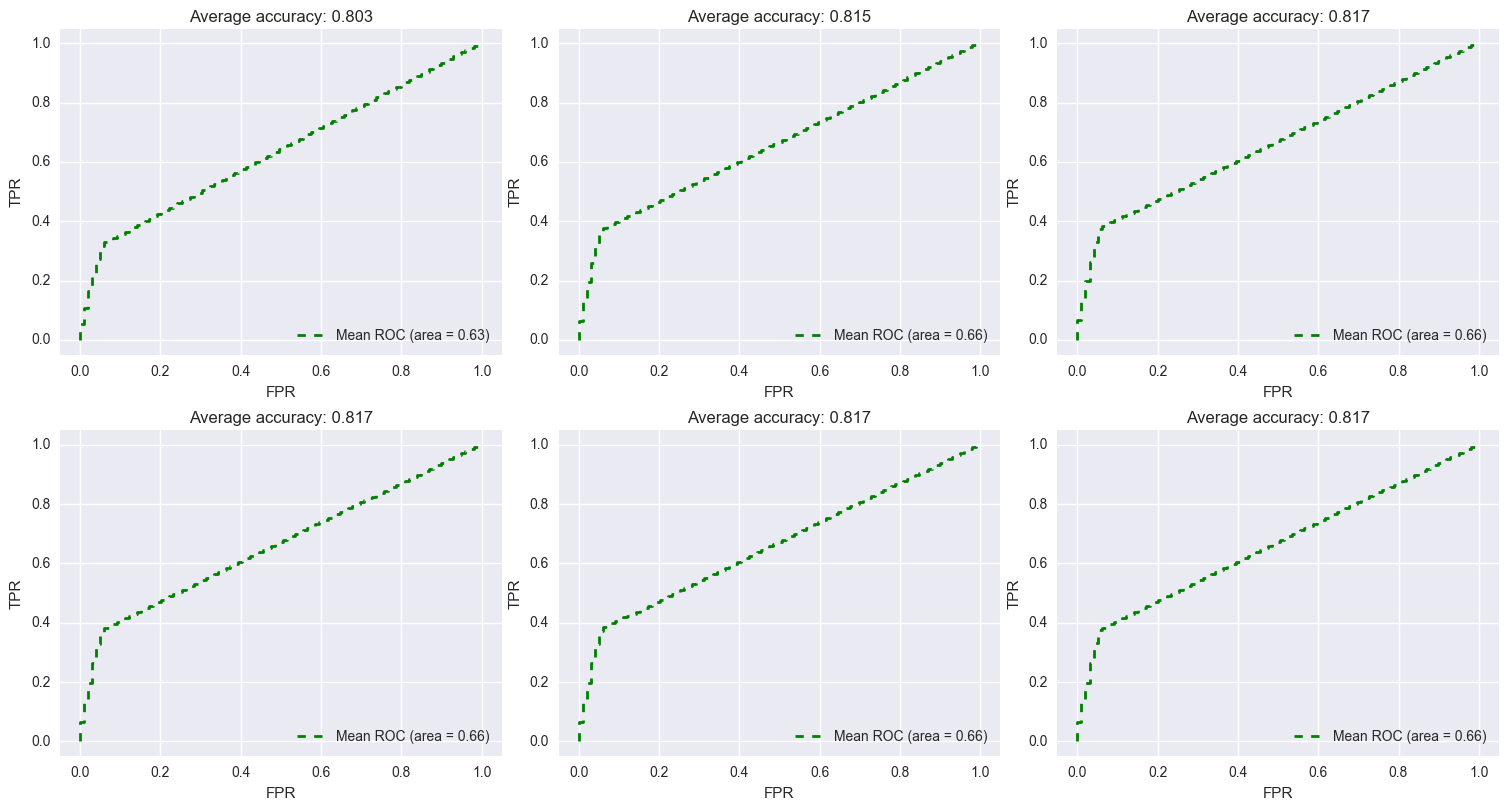

In [7]:
plt.figure(figsize=(15,8))

for i in range(len(estimators)):
    forest = RandomForestClassifier(n_estimators=estimators[i], n_jobs=-1)
    plt.subplot(2,3,i+1)
    print(algorithm(forest,colors,default_train,default_test,pos = None),"estimators: ",estimators[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)   

Maximum Depth of Tree

Average accuracy: 0.781 (+/-0.002) maximum depth:  1
Average accuracy: 0.802 (+/-0.003) maximum depth:  2
Average accuracy: 0.816 (+/-0.005) maximum depth:  50
Average accuracy: 0.818 (+/-0.004) maximum depth:  100
Average accuracy: 0.816 (+/-0.004) maximum depth:  300
Average accuracy: 0.817 (+/-0.008) maximum depth:  800
Average accuracy: 0.817 (+/-0.005) maximum depth:  None


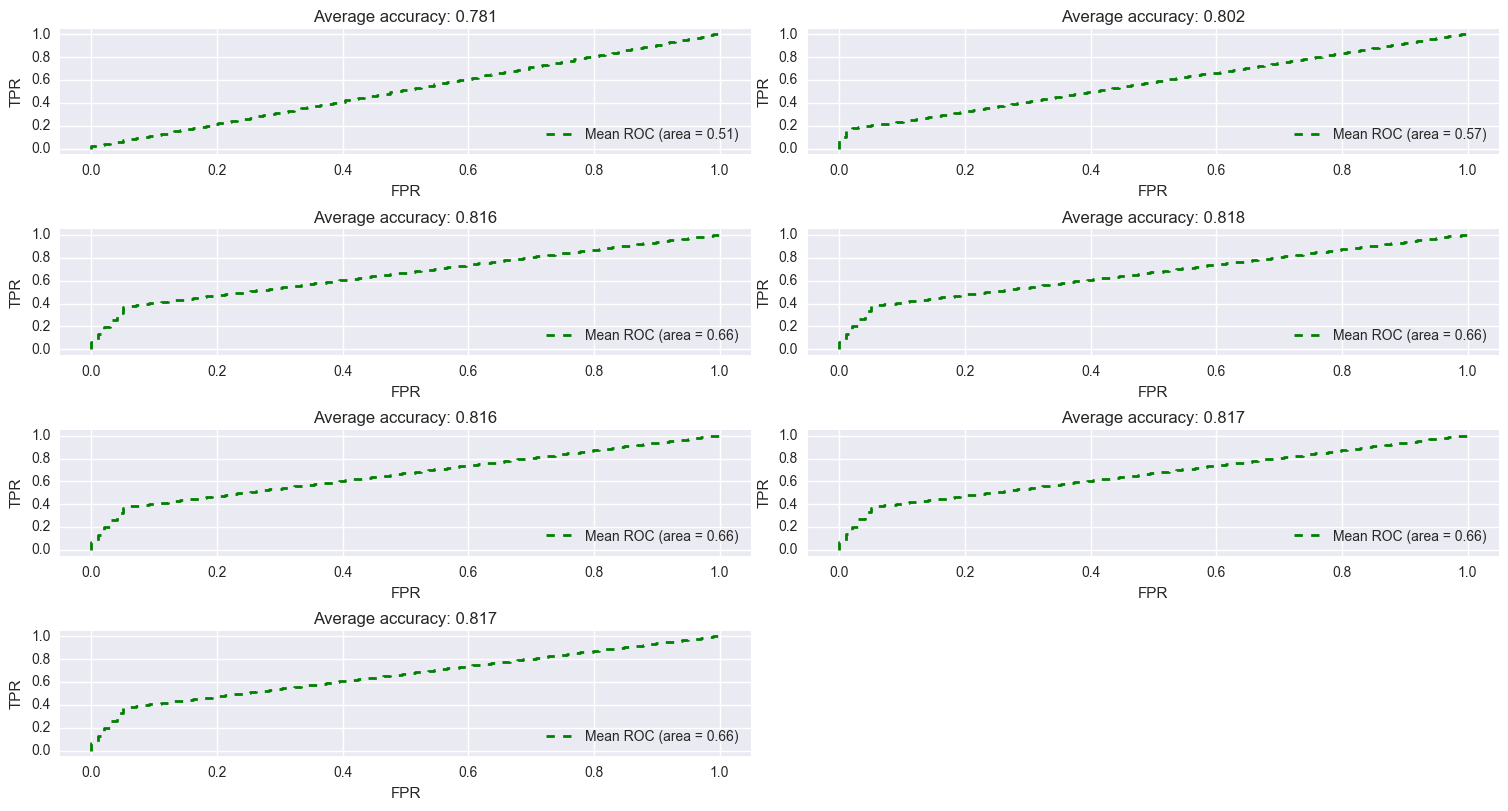

In [8]:
plt.figure(figsize=(15,8))
for i in range(len(depth)):
    forest = RandomForestClassifier(n_estimators=600, n_jobs=-1, max_depth = depth[i])
    plt.subplot(4,2,i+1)
    print(algorithm(forest,colors,default_train,default_test,pos = None),"maximum depth: ",depth[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)  

The number of features to consider when looking for the best split

Average accuracy: 0.817 (+/-0.004) max features:  auto
Average accuracy: 0.816 (+/-0.003) max features:  sqrt
Average accuracy: 0.817 (+/-0.003) max features:  0.2
Average accuracy: 0.815 (+/-0.004) max features:  None


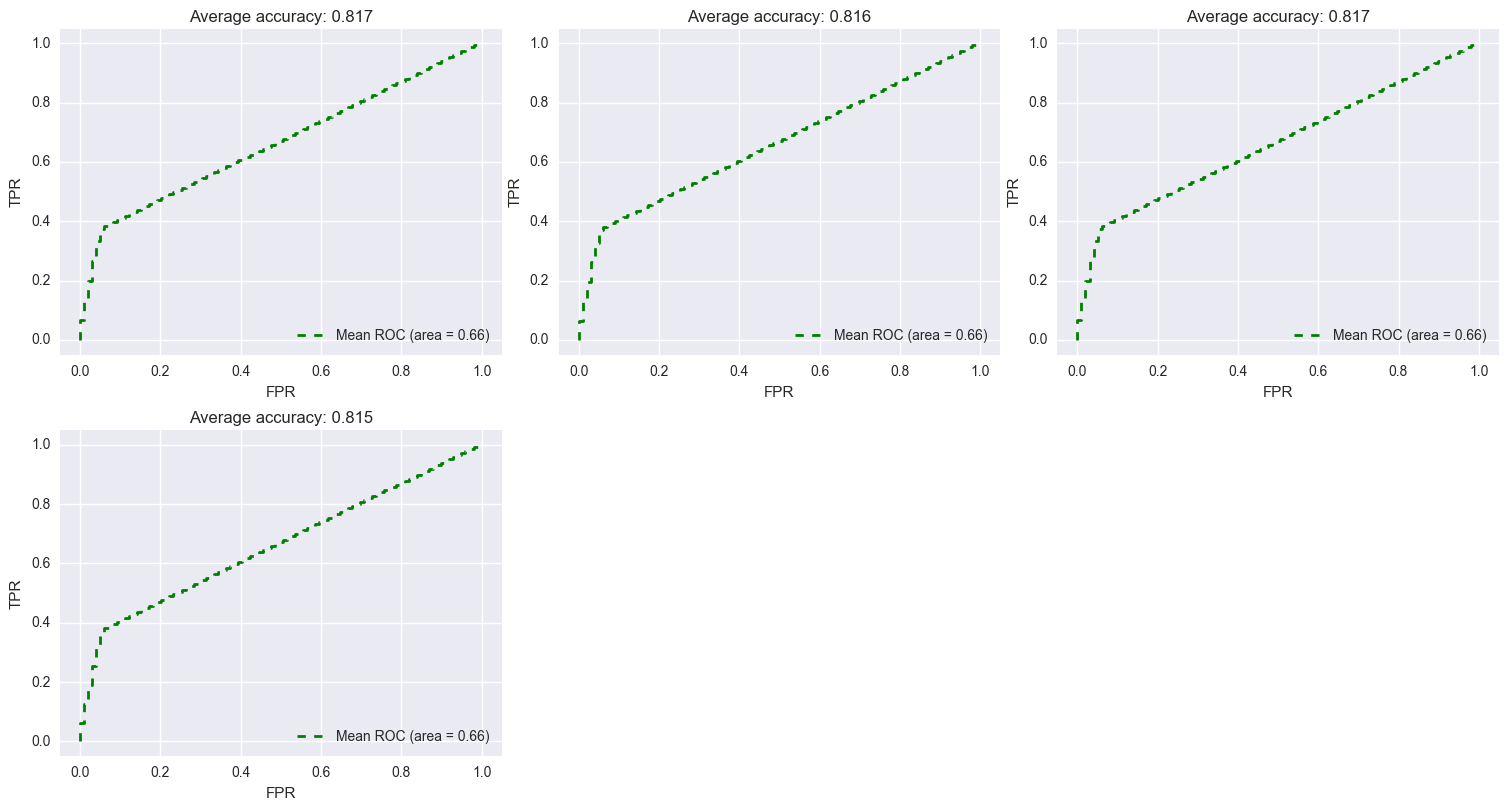

In [9]:
plt.figure(figsize=(15,8))
for i in range(len(features)):
    forest = RandomForestClassifier(n_estimators=600, n_jobs=-1, max_depth = 100,   \
                                    max_features = features[i])
    plt.subplot(2,3,i+1)
    print(algorithm(forest,colors,default_train,default_test,pos = None),"max features: ",features[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)    

the minimum number of samples required to be at a leaf node

Average accuracy: 0.818 (+/-0.004) min sample leaf:  1
Average accuracy: 0.820 (+/-0.005) min sample leaf:  5
Average accuracy: 0.820 (+/-0.005) min sample leaf:  10
Average accuracy: 0.820 (+/-0.007) min sample leaf:  50
Average accuracy: 0.819 (+/-0.002) min sample leaf:  100
Average accuracy: 0.815 (+/-0.006) min sample leaf:  200
Average accuracy: 0.810 (+/-0.005) min sample leaf:  500


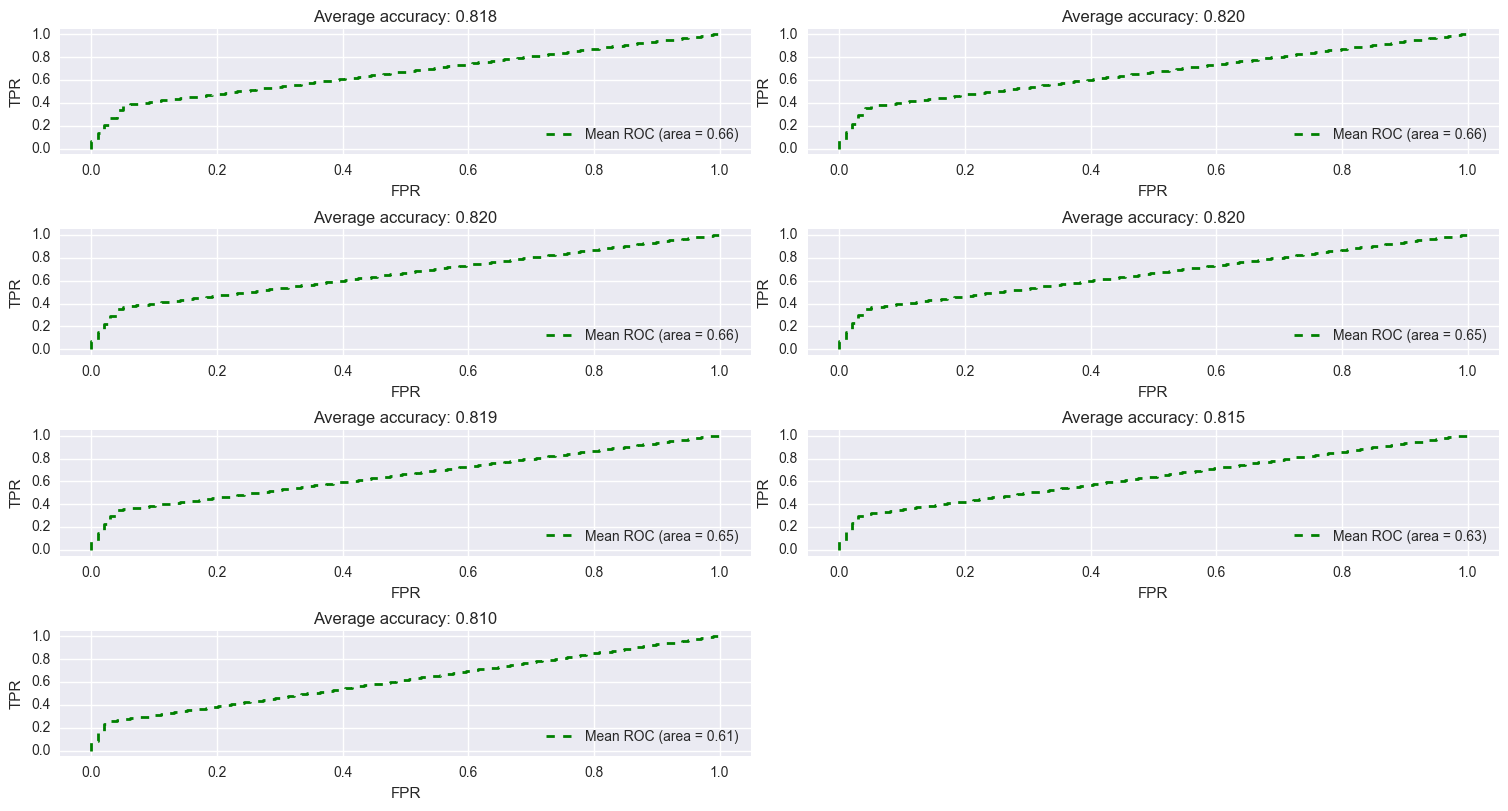

In [10]:
plt.figure(figsize=(15,8))
for i in range(len(min_sampleleaf)):
    forest = RandomForestClassifier(n_estimators=600, n_jobs=-1, max_depth = 100,max_features = 'auto',  \
                                    min_samples_leaf =min_sampleleaf[i] )
    plt.subplot(4,2,i+1)
    print(algorithm(forest,colors,default_train,default_test,pos = None),"min sample leaf: ",min_sampleleaf[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) 

random_state is the seed used by the random number generator

Average accuracy: 0.820 (+/-0.004) random state:  1
Average accuracy: 0.820 (+/-0.005) random state:  50
Average accuracy: 0.820 (+/-0.004) random state:  100
Average accuracy: 0.820 (+/-0.005) random state:  500
Average accuracy: 0.820 (+/-0.007) random state:  None


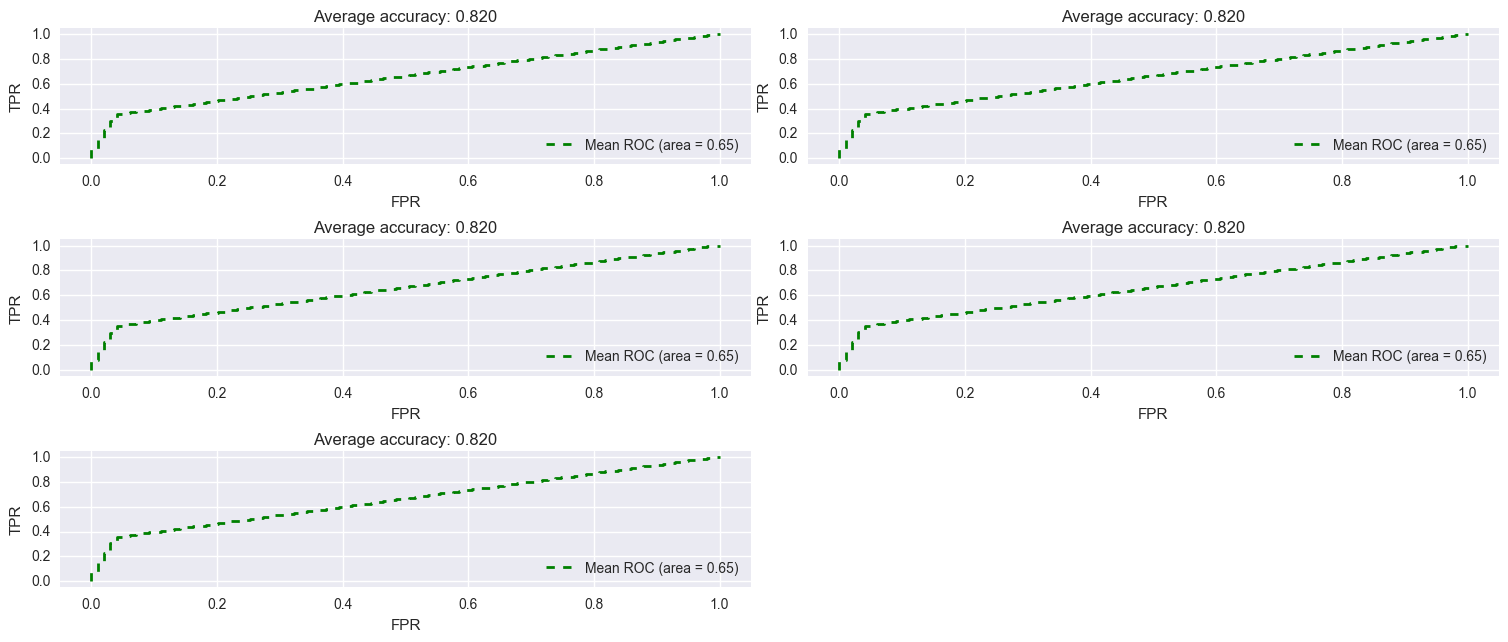

In [11]:
plt.figure(figsize=(15,8))
for i in range(len(randomstate)):
    forest = RandomForestClassifier(n_estimators=600, n_jobs=-1, max_depth = 100,max_features = 'auto',  \
                                    min_samples_leaf =50,random_state=randomstate[i] )
    plt.subplot(4,2,i+1)
    print(algorithm(forest,colors,default_train,default_test,pos = None),"random state: ",randomstate[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)    

Best Parameters using Greedy Approach

Average accuracy: 0.820 (+/-0.005)


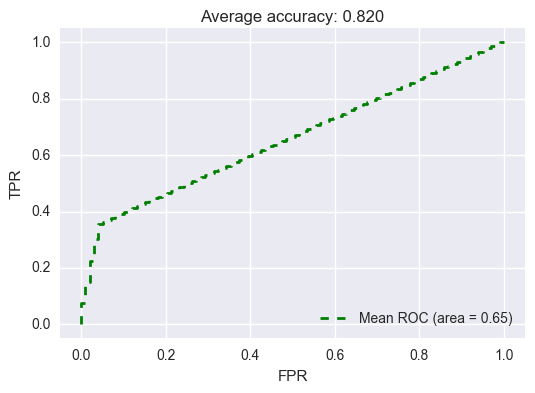

In [12]:
forest = RandomForestClassifier(n_estimators=600, n_jobs=-1, max_depth = 100,max_features = 'auto',   \
                                min_samples_leaf =50,random_state = None)
print(algorithm(forest,colors,default_train,default_test,pos = None))

Random Forest Best Parameters

In [13]:
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

# Logistic Regression

L1 or L2 regularization?

Average accuracy: 0.811 (+/-0.004) Penalty:  l1
Average accuracy: 0.779 (+/-0.000) Penalty:  l2


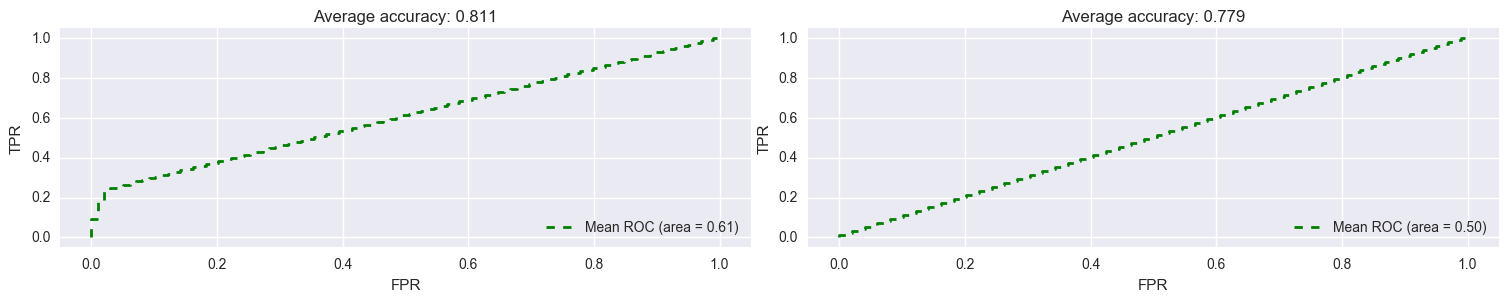

In [14]:
plt.figure(figsize=(15,8))
for i in range(len(penalties)):
    logistic = LogisticRegression(n_jobs = -1, penalty= penalties[i])
    plt.subplot(3,2,i+1)
    print(algorithm(logistic,colors,default_train,default_test,pos = None),"Penalty: ",penalties[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)  

Algorithm to use in the optimization problem?

In [ ]:
plt.figure(figsize=(15,8))
for i in range(len(solve)):
    logistic = LogisticRegression(n_jobs = -1, penalty= 'l2',  solver = solve[i])
    plt.subplot(2,3,i+1)
    print(algorithm(logistic,colors,default_train,default_test,pos = None),"Solver: ",solve[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

C Value: Inverse of regularization strength

In [ ]:
plt.figure(figsize=(15,8))
for i in range(len(cvalue)):
    logistic = LogisticRegression(n_jobs = -1, penalty= 'l2', solver = 'liblinear', C = cvalue[i])\
    
    plt.subplot(2,3,i+1)
    print(algorithm(logistic,colors,default_train,default_test,pos = None),"C: ",cvalue[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

Weights associated with classes

In [ ]:
plt.figure(figsize=(15,8))
for i in range(len(classweight)):
    logistic = LogisticRegression(n_jobs = -1, penalty= 'l2', C = 0.5 , solver = 'liblinear',  \
                                  class_weight = classweight[i])
    plt.subplot(2,3,i+1)
    print(algorithm(logistic,colors,default_train,default_test,pos = None),"Class Weight: ",classweight[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) 

Maximum Iterations

In [ ]:
plt.figure(figsize=(15,8))
for i in range(len(max_iter)):
    logistic = LogisticRegression(n_jobs = -1, penalty= 'l2', C = 0.5 , solver = 'liblinear', \
                                  class_weight = None ,max_iter = max_iter[i])
    plt.subplot(2,3,i+1)
    print(algorithm(logistic,colors,default_train,default_test,pos = None),"Max iterations: ",max_iter[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) 

Ignoring Maximum iterations because of two reasons:<br/>

1. Accuracy decreasing <br/>
2. Useful only for the newton-cg, sag and lbfgs solvers<br/>

Random State: The seed of the pseudo random number generator to use when shuffling the data


In [ ]:
plt.figure(figsize=(15,8))
for i in range(len(randomState)):
    logistic = LogisticRegression(n_jobs = -1, penalty= 'l2', C = 0.5 , solver = 'liblinear', \
                                  class_weight = None,random_state = randomState[i])
    plt.subplot(2,3,i+1)
    print(algorithm(logistic,colors,default_train,default_test,pos = None),"Random State: ",randomState[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

Best Parameters using Greedy Approach

In [ ]:
logistic = LogisticRegression(n_jobs = -1, penalty= 'l2', C = 0.5 , solver = 'liblinear',  \
                              class_weight = None,random_state = 500)
print(algorithm(logistic,colors,default_train,default_test,pos = None))

Logistic Regression Best Parameters

In [ ]:
logistic

# Naive Bayes

In [ ]:
naive = GaussianNB()
print(algorithm(naive,colors,default_train,default_test,pos = None))

Naive Bayes Best Parameters

In [ ]:
naive

# k Nearest Neighbors

Number of neighbors

In [ ]:
plt.figure(figsize=(15,8))
for i in range(len(neighbors)):
    knneigh = KNeighborsClassifier(n_jobs = -1,n_neighbors= neighbors[i])
    plt.subplot(2,3,i+1)
    print(algorithm(knneigh,colors,default_train,default_test,pos = None),"Neighbors: ",neighbors[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) 

weight function used in prediction

In [ ]:
plt.figure(figsize=(15,8))
for i in range(len(weight)):
    knneigh = KNeighborsClassifier(n_jobs = -1,n_neighbors=5, weights = weight[i])
    plt.subplot(2,3,i+1)
    print(algorithm(knneigh,colors,default_train,default_test,pos = None),"Weights: ",weight[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) 

Algorithm used to compute the nearest neighbors

In [ ]:
plt.figure(figsize=(15,8))
for i in range(len(algo)):
    knneigh = KNeighborsClassifier(n_jobs = -1,n_neighbors=5, weights = 'uniform', algorithm = algo[i])
    plt.subplot(2,3,i+1)
    print(algorithm(knneigh,colors,default_train,default_test,pos = None),"Algorithm: ",algo[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) 

Best Parameters using Greedy Approach

In [ ]:
knneigh = KNeighborsClassifier(n_jobs = -1,n_neighbors=5, weights = 'uniform', algorithm = 'auto')
print(algorithm(knneigh,colors,default_train,default_test,pos = None))

K Nearest Neighbors Best Parameters

In [ ]:
knneigh

# Support Vector Machines

Dual or primal optimization

In [ ]:
plt.figure(figsize=(15,8))
for i in range(len(dual)):
    svm = LinearSVC(dual = dual[i])
    plt.subplot(2,3,i+1)
    print(algorithm(svm,colors,default_train,default_test,pos = None),"Dual: ",dual[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) 

C Value: Inverse of regularization strength

In [ ]:
plt.figure(figsize=(15,8))
for i in range(len(cvalue)):
    svm = LinearSVC(dual = False, C = cvalue[i])
    plt.subplot(2,3,i+1)
    print(algorithm(svm,colors,default_train,default_test,pos = None),"C: ",cvalue[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) 

L1 or L2 regularization?

In [ ]:
plt.figure(figsize=(15,8))
for i in range(len(penalties)):
    svm = LinearSVC(dual = False, C = 1, penalty = penalties[i])
    plt.subplot(2,3,i+1)
    print(algorithm(svm,colors,default_train,default_test,pos = None),"Penalty: ",penalties[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) 

weight function used in prediction

In [ ]:
plt.figure(figsize=(15,8))
for i in range(len(classweight)):
    svm = LinearSVC(dual = False, C = 1, penalty = 'l1', class_weight=classweight[i])
    plt.subplot(2,3,i+1)
    print(algorithm(svm,colors,default_train,default_test,pos = None),"Class Weight: ",classweight[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) 

Maximum Iterations

In [ ]:
plt.figure(figsize=(15,8))
for i in range(len(max_iter)):
    svm = LinearSVC(dual = False, C = 1, penalty = 'l1', class_weight=None,max_iter=max_iter[i])
    plt.subplot(2,3,i+1)
    print(algorithm(svm,colors,default_train,default_test,pos = None),"Max Iterations: ",max_iter[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) 

Random State = The seed of the pseudo random number generator to use when shuffling the data.

In [ ]:
plt.figure(figsize=(15,8))
for i in range(len(randomState)):
    svm = LinearSVC(dual = False, C = 1, penalty = 'l1', class_weight=None,max_iter=1000,random_state=randomState[i])
    plt.subplot(2,3,i+1)
    print(algorithm(svm,colors,default_train,default_test,pos = None),"Random State: ",randomState[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) 

Best Parameters using Greedy Approach

In [ ]:
svm = LinearSVC(dual = False, C = 1, penalty = 'l1', class_weight=None,max_iter=1000,random_state=1000)
print(algorithm(svm,colors,default_train,default_test,pos = None))

SVM Best Parameters

In [ ]:
svm

Our kNN implementation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(default.iloc[:,:-1], default.iloc[:,-1:], test_size=0.20, random_state=4212)
train = pd.concat([X_train, y_train], axis=1)

In [ ]:
predictions = []
for i,c in X_test.iterrows():
    neigh = knn(train,c,5)
    responses = majorityVote(neigh)
    predictions.append(responses)
mine_knn = pd.DataFrame( data={"predicted":predictions,"actual":y_test.values.ravel()} ) 
print ("accuracy_score: ", accuracy_score(mine_knn['actual'],mine_knn['predicted']))